In [6]:
import json
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

# Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
# model = MobileNetV2()

# Tampilkan layer-layer model VGG16
model.summary()

# Baca file imagenet-simple-labels.json
with open('imagenet-simple-labels.json') as f:
    labels = json.load(f)

# Tampilkan label-label yang terkait dengan model
for idx, label in enumerate(labels):
    print(f"{idx}: {label}")


Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 480, 480, 3)  0           ['input_3[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling_2[0][0]']            
                                )                                                                 
                                                                                   

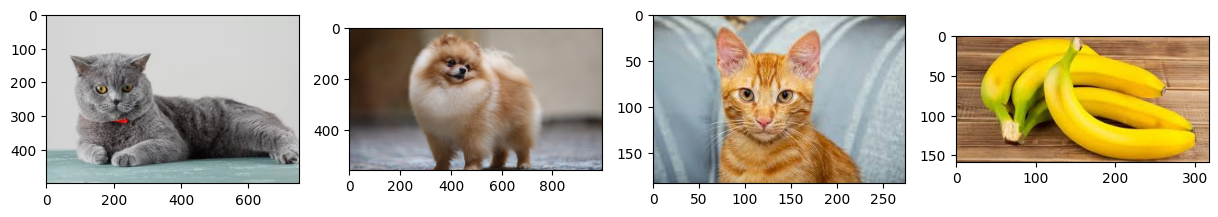

1/1 [==============================] - 9s 9s/step
https://assets.ayobandung.com/crop/0x0:0x0/750x500/webp/photo/2022/10/15/366382835.jpg: tabby cat
https://www.purina.co.id/sites/default/files/2023-02/Mengenali%20Jenis%20Anjing%20Pomeranian%20copy.jpg: Pomeranian
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPXBxsqLx2gkepVIe9uytyY9A_qoeqmhh5XQ&usqp=CAU: tiger cat
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRizZsBS_yDMVjHvQMuu-QURbCZ-q2Kus93ug&usqp=CAU: banana


In [21]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import json
from keras.applications.efficientnet_v2 import preprocess_input

# Load JSON labels
with open('imagenet-simple-labels.json') as f:
    labels = json.load(f)

urls = []

urls.append("https://assets.ayobandung.com/crop/0x0:0x0/750x500/webp/photo/2022/10/15/366382835.jpg")
urls.append("https://www.purina.co.id/sites/default/files/2023-02/Mengenali%20Jenis%20Anjing%20Pomeranian%20copy.jpg")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPXBxsqLx2gkepVIe9uytyY9A_qoeqmhh5XQ&usqp=CAU")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRizZsBS_yDMVjHvQMuu-QURbCZ-q2Kus93ug&usqp=CAU")
#urls.append("")

imgs = []
plt.figure(figsize=(15, 6))

for u in range(0, len(urls)):
    r = requests.get(urls[u], stream=True)  # Download
    img = np.array(Image.open(r.raw))  # Convert to numpy array
    plt.subplot(1, len(urls), u+1)
    plt.imshow(img)
    img = cv2.resize(img, (480, 480))
    imgs.append(img)

plt.show()
imgs = np.array(imgs)

# Preprocess images for EfficientNetV2-M
imgs = preprocess_input(imgs)

yh = model.predict(imgs)

for i in range(len(urls)):
    label_index = np.argmax(yh[i])
    label = labels[label_index]
    print(f"{urls[i]}: {label}")
